In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data


In [2]:
client_id = "f80c42e300c0429ca10bfff5a6e95ad2"
client_secret = "4b971d6e32034bc292aa836a679e9f03"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API
name = "Taylor Swift" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
  'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
  'id': '06HL4z0CvFAxyc27GXpf02',
  'name': 'Taylor Swift',
  'type': 'artist',
  'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}]

In [3]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:3lS1y25WAhcqJDATJK70Mq',
 'spotify:album:4894htPwC6zoiuTqUQwn4I',
 'spotify:album:151w1FgRZfnKZA9FEcg9Z3',
 'spotify:album:4moVP48t9bji7djUc5VOvi',
 'spotify:album:6kZ42qRrzov54LcAk4onW9',
 'spotify:album:6x9s2ObPdpATZgrwxsk9c0',
 'spotify:album:4hDok0OAJd57SGIT8xuWJH',
 'spotify:album:6AORtDjduMM3bupSWzbTSG',
 'spotify:album:1DT6fDJL6AWPJxe7Lq1dPb',
 'spotify:album:2Xoteh7uEpea4TohMxjtaq',
 'spotify:album:40zKHK0aGM4PITqPy5vfQh',
 'spotify:album:5jmVg7rwRcgd6ARPAeYNSm',
 'spotify:album:0PZ7lAru5FDFHuirTkWe9Z',
 'spotify:album:3VaaZ7OIbGLi60NVsnueoo',
 'spotify:album:1pzvBxYgT6OVwJLtHkrdQK',
 'spotify:album:7v7pe5vZQPWB5zW0JrKRiw',
 'spotify:album:2fenSS68JI1h4Fo296JfGr',
 'spotify:album:0xS0iOtxQRoJvfcFcJA5Gv',
 'spotify:album:1NAmidJlEaVgA3MpcPFYGq',
 'spotify:album:1MHuZZrGT36cXLxAQ5cLP3']

In [6]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [7]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Midnights (3am Edition) songs has been added to spotify_albums dictionary
Album Midnights (3am Edition) songs has been added to spotify_albums dictionary
Album Midnights songs has been added to spotify_albums dictionary
Album Midnights songs has been added to spotify_albums dictionary
Album Red (Taylor's Version) songs has been added to spotify_albums dictionary
Album Red (Taylor's Version) songs has been added to spotify_albums dictionary
Album Fearless (Taylor's Version) songs has been added to spotify_albums dictionary
Album evermore (deluxe version) songs has been added to spotify_albums dictionary
Album evermore (deluxe version) songs has been added to spotify_albums dictionary
Album evermore songs has been added to spotify_albums dictionary
Album evermore songs has been added to spotify_albums dictionary
Album evermore songs has been added to spotify_albums dictionary
Album folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] songs has been ad

In [8]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [9]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 21.867212533950806 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 40.183566093444824 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 61.716073513031006 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 77.62559056282043 seconds


In [15]:
dic_df = {}
dic_df['artist'] = []
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        dic_df['artist']="Taylor Swift"
        
len(dic_df['album'])

398

In [16]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
df

,artist,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Taylor Swift,Midnights (3am Edition),1,4g2c7NoTWAOSYDy44l9nub,Lavender Haze,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.20400,0.735,0.4440,0.001200,0.1700,-10.519,0.0684,97.038,0.0984,74
1,Taylor Swift,Midnights (3am Edition),2,199E1RRrVmVTQqBXih5qRC,Maroon,spotify:track:199E1RRrVmVTQqBXih5qRC,0.05930,0.658,0.3780,0.000000,0.0976,-8.300,0.0379,108.034,0.0382,74
2,Taylor Swift,Midnights (3am Edition),3,02Zkkf2zMkwRGQjZ7T4p8f,Anti-Hero,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,0.13300,0.638,0.6340,0.000001,0.1520,-6.582,0.0457,96.953,0.5190,75
3,Taylor Swift,Midnights (3am Edition),4,6ADDIJxxqzM9LMpm78yzQG,Snow On The Beach (feat. Lana Del Rey),spotify:track:6ADDIJxxqzM9LMpm78yzQG,0.73500,0.659,0.3230,0.003210,0.1160,-13.425,0.0436,110.007,0.1540,72
4,Taylor Swift,Midnights (3am Edition),5,7gVWKBcfIW93YxNBi3ApIE,"You're On Your Own, Kid",spotify:track:7gVWKBcfIW93YxNBi3ApIE,0.41600,0.694,0.3800,0.000008,0.1260,-10.307,0.0614,120.044,0.3760,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Taylor Swift,Taylor Swift Karaoke: reputation,11,3ZfvKQxJp4zZshiJsRPoD1,Dancing With Our Hands Tied - Karaoke Version,spotify:track:3ZfvKQxJp4zZshiJsRPoD1,0.08440,0.426,0.5290,0.098600,0.1010,-7.953,0.1700,75.958,0.2170,16
394,Taylor Swift,Taylor Swift Karaoke: reputation,12,2k0w1FGqvzVPgQ9VdTaJpe,Dress - Karaoke Version,spotify:track:2k0w1FGqvzVPgQ9VdTaJpe,0.03480,0.682,0.4570,0.020500,0.2170,-11.087,0.0387,120.029,0.0383,14
395,Taylor Swift,Taylor Swift Karaoke: reputation,13,0MtU9ETYyVX8YPBDCYPdMb,This Is Why We Can't Have Nice Things - Karaok...,spotify:track:0MtU9ETYyVX8YPBDCYPdMb,0.00927,0.594,0.7570,0.000236,0.4010,-5.384,0.0572,163.948,0.2140,15
396,Taylor Swift,Taylor Swift Karaoke: reputation,14,1VPHQriwOsy5aGHLwwZyho,Call It What You Want - Karaoke Version,spotify:track:1VPHQriwOsy5aGHLwwZyho,0.09430,0.594,0.4540,0.705000,0.7550,-13.010,0.0401,164.028,0.1390,16


In [17]:
print(len(df))
final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

398
160


In [18]:
final_df.to_csv("Taylor Swift.csv")


PermissionError: [Errno 13] Permission denied: 'Taylor Swift.csv'

In [24]:
artist_list={ "Dua Lipa" , "Calvin Harris", "Coldplay", "21 Savage"}
for name in artist_list:
    
    result = sp.search(name) #search query
    artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
    #Pull all of the artist's albums
    sp_albums = sp.artist_albums(artist_uri, album_type='album')
    #Store artist's albums' names' and uris in separate lists
    album_names = []
    album_uris = []
    for i in range(len(sp_albums['items'])):
        album_names.append(sp_albums['items'][i]['name'])
        album_uris.append(sp_albums['items'][i]['uri'])

    spotify_albums = {}
    album_count = 0
    for i in album_uris: #each album
        albumSongs(i)
        print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
        album_count+=1 #Updates album count once all tracks have been added
    sleep_min = 2
    sleep_max = 5
    start_time = time.time()
    request_count = 0
    for i in spotify_albums:
        audio_features(i)
        request_count+=1
        if request_count % 5 == 0:
            print(str(request_count) + " playlists completed")
            time.sleep(np.random.uniform(sleep_min, sleep_max))
            print('Loop #: {}'.format(request_count))
            print('Elapsed Time: {} seconds'.format(time.time() - start_time))      
    dic_df = {}
    dic_df['artist'] = []
    dic_df['album'] = []
    dic_df['track_number'] = []
    dic_df['id'] = []
    dic_df['name'] = []
    dic_df['uri'] = []
    dic_df['acousticness'] = []
    dic_df['danceability'] = []
    dic_df['energy'] = []
    dic_df['instrumentalness'] = []
    dic_df['liveness'] = []
    dic_df['loudness'] = []
    dic_df['speechiness'] = []
    dic_df['tempo'] = []
    dic_df['valence'] = []
    dic_df['popularity'] = []
    for album in spotify_albums: 
        for feature in spotify_albums[album]:
            dic_df[feature].extend(spotify_albums[album][feature])
            dic_df['artist']=name
    df = pd.DataFrame.from_dict(dic_df)
    final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
    final_df.to_csv(name+".csv")

Album Black Panther: Wakanda Forever - Music From and Inspired By songs has been added to spotify_albums dictionary
Album ANTI (Deluxe) songs has been added to spotify_albums dictionary
Album ANTI (Deluxe) songs has been added to spotify_albums dictionary
Album ANTI songs has been added to spotify_albums dictionary
Album ANTI songs has been added to spotify_albums dictionary
Album Unapologetic (Deluxe Version) songs has been added to spotify_albums dictionary
Album Unapologetic (Deluxe Version) songs has been added to spotify_albums dictionary
Album Unapologetic (Deluxe) songs has been added to spotify_albums dictionary
Album Unapologetic (Deluxe) songs has been added to spotify_albums dictionary
Album Unapologetic songs has been added to spotify_albums dictionary
Album Unapologetic songs has been added to spotify_albums dictionary
Album Unapologetic (Deluxe) songs has been added to spotify_albums dictionary
Album Unapologetic (Edited Version) songs has been added to spotify_albums dic

In [6]:
import pandas as pd
import glob
import os

In [26]:
os.listdir()

['.cache',
 '.ipynb_checkpoints',
 '21 Savage.csv',
 'Bad Bunny.csv',
 'Calvin Harris.csv',
 'Coldplay.csv',
 'David Guetta.csv',
 'Drake.csv',
 'Dua Lipa.csv',
 'Ed Sheeran.csv',
 'Justin Bieber.csv',
 'Miley Cyrus.csv',
 'SZA.csv',
 'Taylor Swift.csv',
 'The Weeknd.csv',
 'Untitled.ipynb']

In [7]:

  
# A list of all joined files is returned
joined_list = {'21 Savage.csv',
 'Bad Bunny.csv',
 'Calvin Harris.csv',
 'Coldplay.csv',
 'David Guetta.csv',
 'Drake.csv',
 'Dua Lipa.csv',
 'Ed Sheeran.csv',
 'Justin Bieber.csv',
 'Miley Cyrus.csv',
 'SZA.csv',
 'Taylor Swift.csv',
 'The Weeknd.csv'}
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
print(df)

      Unnamed: 0      artist                        album  track_number  \
0              0    Dua Lipa  Come Home The Kids Miss You             1   
1              1    Dua Lipa  Come Home The Kids Miss You             2   
2              2    Dua Lipa  Come Home The Kids Miss You             3   
3              3    Dua Lipa  Come Home The Kids Miss You             4   
4              4    Dua Lipa  Come Home The Kids Miss You             5   
...          ...         ...                          ...           ...   
1519         352  The Weeknd                  19 & Boomin            13   
1520         353  The Weeknd                  19 & Boomin            14   
1521         354  The Weeknd                  19 & Boomin            15   
1522         355  The Weeknd                  19 & Boomin            16   
1523         356  The Weeknd                  19 & Boomin            17   

                          id                               name  \
0     6DKTGEAjKuUIdY57v7zMpC    

In [8]:
df_data_prep=df


In [9]:
df_data_prep.drop(labels={ 'album', 'track_number', 'id', 'name', 'uri', 'popularity','artist'}, axis=1, inplace= True)
df_data_prep.drop(labels=0, inplace=True)

In [10]:

df_data_prep.drop(df_data_prep.filter(regex="Unname"),axis=1, inplace=True)

In [11]:
df_data_prep

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1,0.00882,0.841,0.566,0.000000,0.0635,-5.501,0.2890,95.941,0.269
2,0.01200,0.832,0.522,0.079000,0.3770,-7.244,0.0500,150.044,0.253
3,0.11100,0.902,0.582,0.000003,0.1110,-5.902,0.1090,107.005,0.332
4,0.00161,0.833,0.652,0.098500,0.1060,-6.942,0.0762,158.022,0.405
5,0.49400,0.667,0.526,0.000267,0.1160,-8.561,0.2810,101.954,0.503
...,...,...,...,...,...,...,...,...,...
1519,0.03240,0.661,0.636,0.000006,0.3830,-8.011,0.0767,132.013,0.148
1520,0.05340,0.731,0.720,0.000000,0.0740,-7.320,0.2950,140.006,0.205
1521,0.02460,0.876,0.375,0.000000,0.2540,-11.355,0.2700,133.997,0.341
1522,0.27900,0.668,0.442,0.000000,0.0668,-10.573,0.3020,124.224,0.168


In [12]:
result = df_data_prep.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()))
result

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1,-0.847682,1.248793,-0.115074,-0.255136,-0.850110,0.604436,0.804926,-0.844323,-0.619608
2,-0.836018,1.188545,-0.342299,0.222025,1.057305,0.068175,-0.650267,0.993857,-0.692854
3,-0.472889,1.657140,-0.032447,-0.255117,-0.561108,0.481062,-0.291035,-0.468417,-0.331201
4,-0.874128,1.195239,0.329047,0.339806,-0.591529,0.161090,-0.490744,1.264914,0.002984
5,0.931941,0.084001,-0.321642,-0.253523,-0.530686,-0.337020,0.756216,-0.640028,0.451617
...,...,...,...,...,...,...,...,...,...
1519,-0.761191,0.043835,0.246420,-0.255097,1.093811,-0.167804,-0.487699,0.381244,-1.173533
1520,-0.684164,0.512430,0.680213,-0.255136,-0.786225,0.044793,0.841458,0.652810,-0.912593
1521,-0.789802,1.483090,-1.101437,-0.255136,0.308941,-1.196637,0.689241,0.448651,-0.290000
1522,0.143329,0.090695,-0.755435,-0.255136,-0.830032,-0.956042,0.884078,0.116608,-1.081975


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
from sklearn.decomposition import PCA
  
from sklearn.cluster import KMeans

In [18]:
pca = PCA(n_components = 3 )

In [19]:
red_dim_df= pca.fit_transform(result)

In [20]:
red_dim_df

array([[-0.29207371, -0.83336517, -1.22217143],
       [-0.52126261,  0.27919277, -0.06466431],
       [-0.49389311, -0.64901774, -1.47389967],
       ...,
       [ 0.94682032, -1.11357838, -0.30938401],
       [ 1.52061081, -0.04893424, -0.27434372],
       [-0.98362521, -0.40771731,  0.89337911]])

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

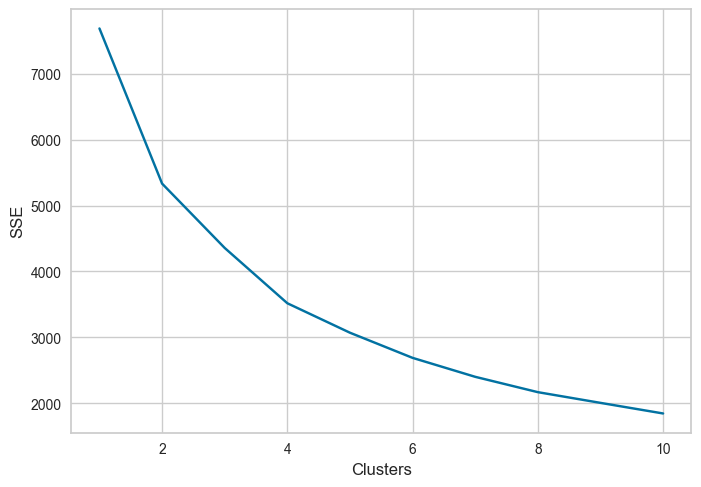

In [21]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=100)
    k_means.fit(red_dim_df)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [40]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=100)
y = k_means_optimum.fit_predict(red_dim_df)
print(y)

[0 0 0 ... 0 3 1]


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
df['cluster'] = y


In [42]:
data1 = df[df.cluster==0]
data2 = df[df.cluster==1]
data3 = df[df.cluster==2]
data4 = df[df.cluster==3]

In [43]:
red_dim_df=pd.DataFrame(red_dim_df)

In [44]:
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

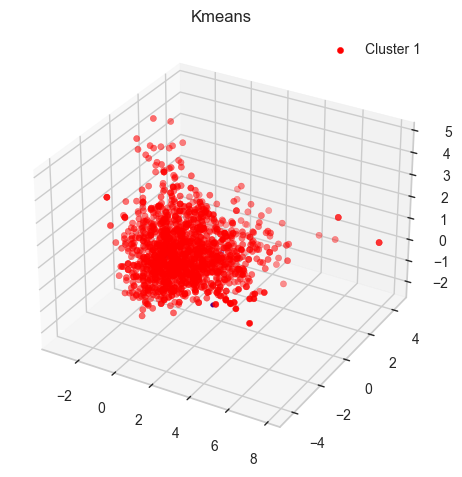

In [47]:

  

kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)

# Data for three-dimensional scattered points
kplot.scatter3D(red_dim_df[0], red_dim_df[1], red_dim_df[2], c='red', label = 'Cluster 1')
#kplot.scatter3D(red_dim_df[0], red_dim_df[1], red_dim_df[2],c ='green', label = 'Cluster 2')
#kplot.scatter3D(red_dim_df[0], red_dim_df[1], red_dim_df[2], c='blue', label = 'Cluster 3')
#kplot.scatter3D(red_dim_df[0], red_dim_df[1], red_dim_df[2],c ='yellow', label = 'Cluster 4')
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1],
            color = 'indigo', s = 10)
plt.legend()
plt.title("Kmeans")
plt.show()

In [14]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

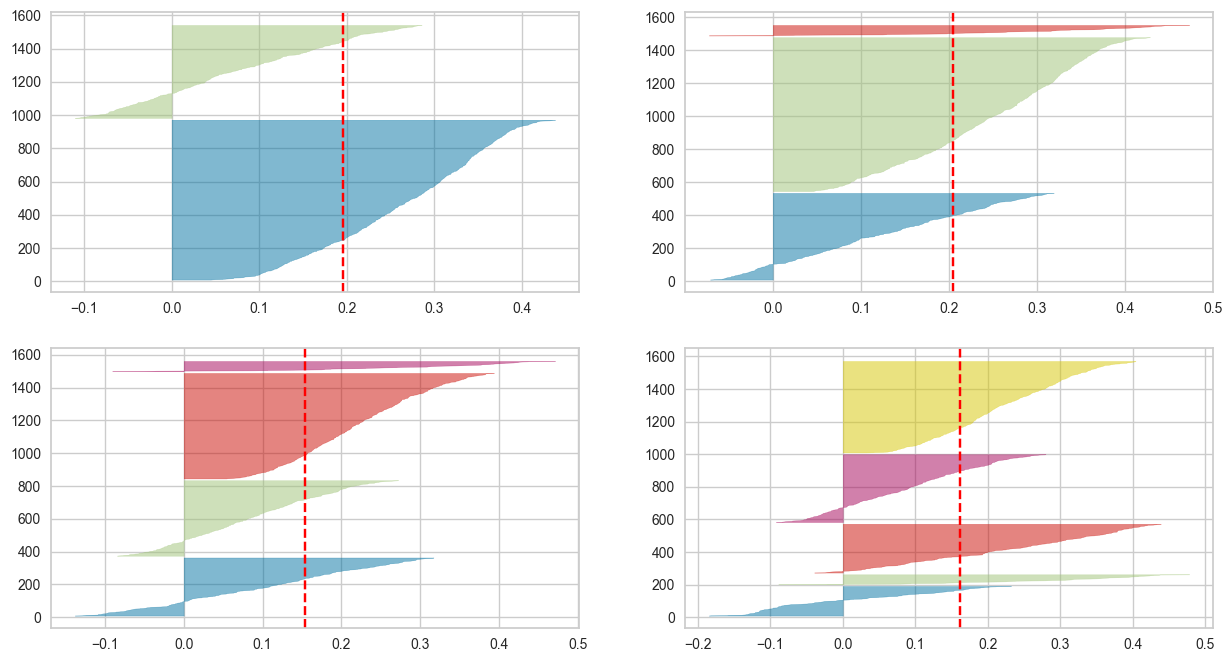

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=100)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(result) 

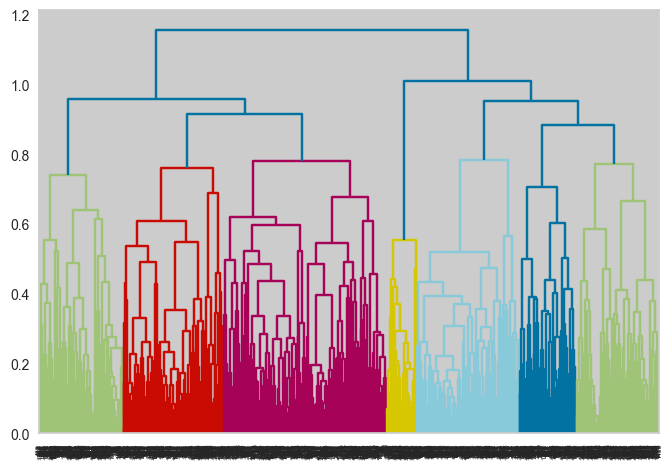

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage




linkage_data = linkage(result, method="average", metric='cosine')
dendrogram(linkage_data )

plt.show()

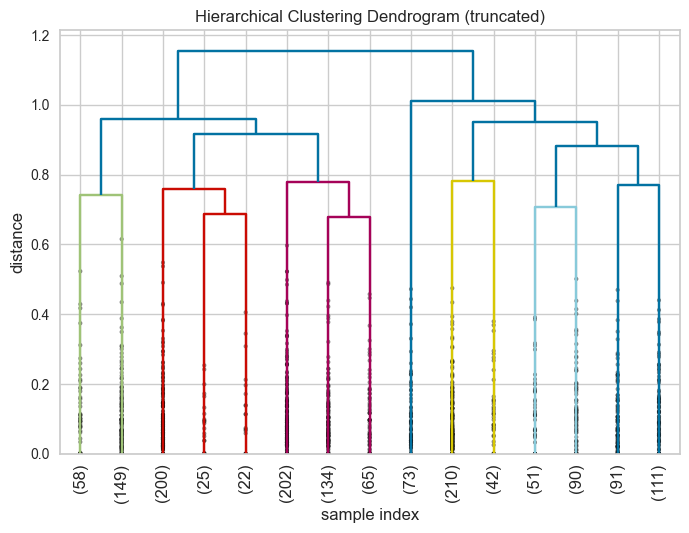

In [38]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage_data,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()